# Training and Running of new GLM model
This Notebook is for training and running the our new GLM model that includes (for now only) deletion tokens

In [1]:
from fundemental_classes.glm_model import GLMModel

model = GLMModel("./dna_bert_final", "simulated_sequences/augumented_sequence_size10000_length150_deletions0.1_nodeletionseq0.25.fasta")

🚨 Config not found for parakeet. You can manually add it to HARDCODED_CONFIG_FOR_MODELS in utils/auto_docstring.py
🚨 Config not found for parakeet. You can manually add it to HARDCODED_CONFIG_FOR_MODELS in utils/auto_docstring.py
🚨 Config not found for parakeet. You can manually add it to HARDCODED_CONFIG_FOR_MODELS in utils/auto_docstring.py


loading configuration file ./dna_bert_final/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "dtype": "float32",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 256,
  "initializer_range": 0.02,
  "intermediate_size": 512,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 4,
  "num_hidden_layers": 4,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.57.3",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 10
}

loading weights file ./dna_bert_final/model.safetensors
loading file tokenizer.json
loading file tokenizer.model
loading file added_tokens.json
loading file special_tokens_map.json
loading file tokenizer_config.json
loading file chat_template.jinja


## Training
We use `Bert` model to create the embeddings and train it using masking to get nicely trained model. If you want to change the size of training data, please look into `simulated_sequences` directory.

In [ ]:
model.train(epochs=30, batch_size=16, lr=2e-4)

## Visualization
This block is used for getting already trained model, passing the sequence to test how well the model performs.
\\\\\
*Important:* For now we pass our test cases by hand. However in the future we will generate good inputs to test how well the model functions

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


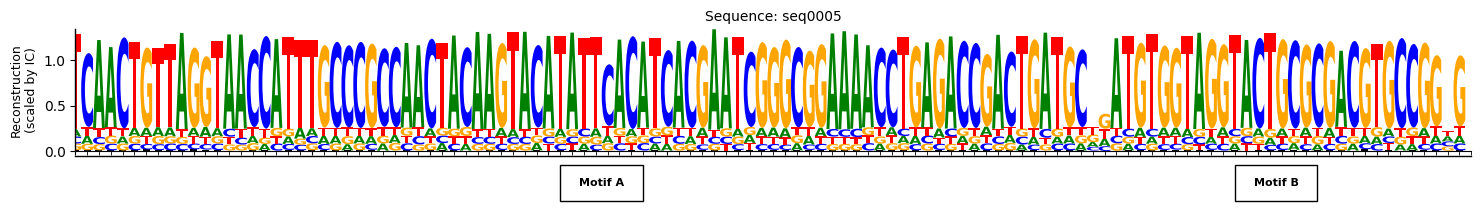

In [2]:
from fundemental_classes.sequence_plotter import SequenceLogoPlotter

plotter = SequenceLogoPlotter()

header = ">seq0005|label=both|posAmotif=41|posBmotif=98|gaplength=50"
sequence = "ATCAACTGTTAGGTAACCATTTGCCCGCCAACTACAAGTACATATTCACATCACGAATCGGGCGGAAAACCTGAGACCGACTGATGC--ATGTGGTAGGTACTGCGCGACGTGCCGGC"

prob_matrix = model.get_full_reconstruction_probs(sequence)

plotter.plot(header, sequence, prob_matrix, motif_length=7)